Multiple Regression
-------

![](https://cdn.meme.am/cache/instances/folder501/500x/65448501.jpg)

A company that makes carseats would like to construct a model to predict sales. 

The data is here: https://s3-us-west-2.amazonaws.com/dsci/6002/data/carseats.csv 

It contains 400 observations on the following 11 variables:

```
Sales:         Unit sales (in thousands) at each location
CompPrice:     Price charged by competitor at each location
Income:        Community income level (in thousands of dollars)
Advertising:   Local advertising budget for company at each location (in thousands of dollars)
Population:    Population size in region (in thousands)
Price:         Price company charges for car seats at each site
ShelveLoc:     A factor with levels Bad, Good and Medium indicating the quality of the shelving location
for the car seats at each site
Age:           Average age of the local population
Education:     Education level at each location
Urban:         A factor with levels No and Yes to indicate whether the store is in an urban or rural location
US:            A factor with levels No and Yes to indicate whether the store is in the US or not
```

-----

Load in datasets

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [3]:
seat = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Carseats.csv')
seat.columns = [col.lower().replace(' ', '_') for col in seat.columns.tolist()]
seat.head()

,sales,compprice,income,advertising,population,price,shelveloc,age,education,urban,us
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
seat.urban.value_counts()

Yes    282
No     118
Name: urban, dtype: int64

In [5]:
seat.us.value_counts()

Yes    258
No     142
Name: us, dtype: int64

In [6]:
seat.us = seat.us.replace(['Yes','No'],[1,0])
seat.urban = seat.urban.replace(['Yes','No'],[1,0])
seat.describe()

,sales,compprice,income,advertising,population,price,age,education,urban,us
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000,0.705000,0.645000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528,0.456614,0.479113
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000,1.000000,1.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000,1.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000,1.000000,1.000000


Visualize the data with the appropriate plots. 

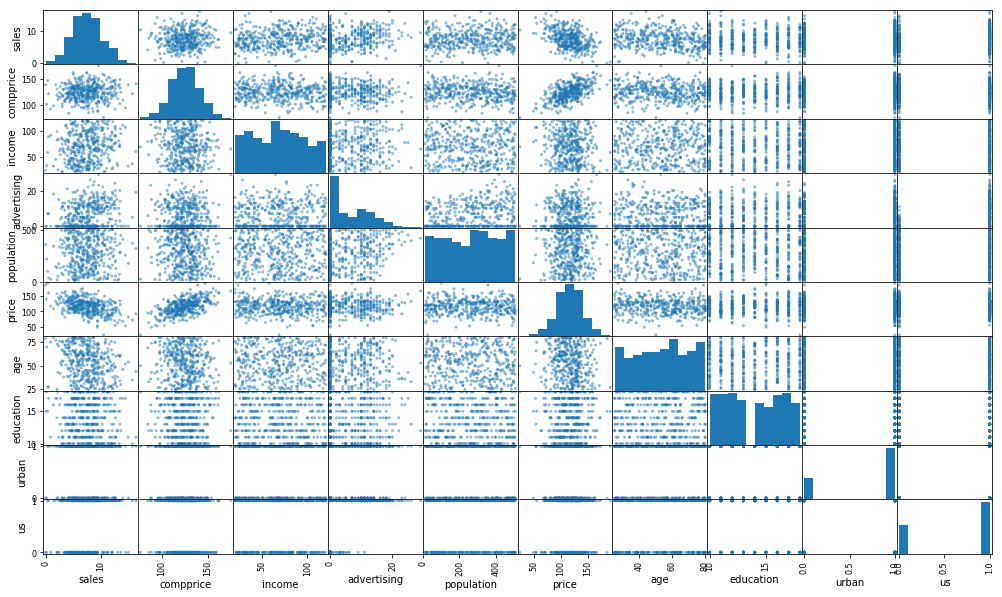

In [7]:
# For example
pd.plotting.scatter_matrix(seat, figsize=(17, 10), edgecolor='none', alpha=0.5);

In [8]:
corrmat = seat.corr()
corrmat

,sales,compprice,income,advertising,population,price,age,education,urban,us
sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955,-0.015419,0.177093
compprice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197,0.066594,0.016869
income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855,0.037967,0.089601
advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594,0.042035,0.684460
population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378,-0.052025,0.060564
price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747,0.047016,0.057861
age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488,0.028479,0.008652
education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000,-0.033094,-0.078250
urban,-0.015419,0.066594,0.037967,0.042035,-0.052025,0.047016,0.028479,-0.033094,1.000000,0.047085
us,0.177093,0.016869,0.089601,0.684460,0.060564,0.057861,0.008652,-0.078250,0.047085,1.000000


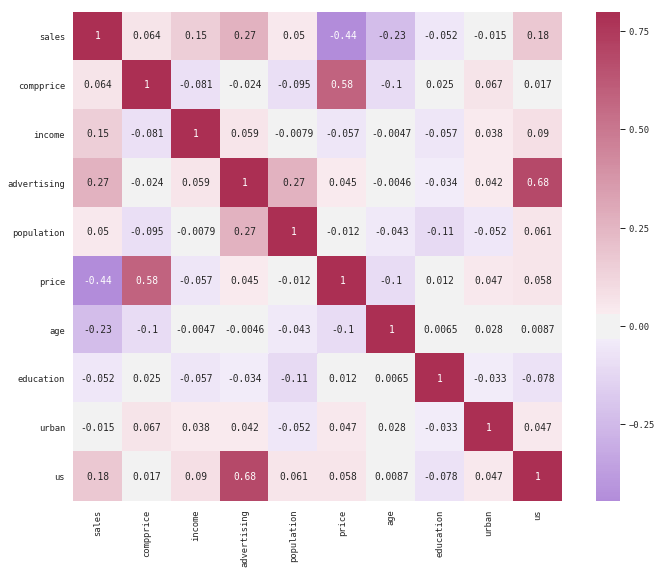

In [9]:
sns.set(context="paper", font="monospace")
corrmat = seat.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))
cmap = sns.diverging_palette(280, 0, n=3, l=40, as_cmap=True)
sns.heatmap(corrmat, vmax=.8, center=0, cmap=cmap, annot=True, square=True)

What trends do you see in the data?

high negative correlation between price and sales, high positive between advertising and sales 

Find the single best predictor for a simple linear regression.

<br>

<details><summary>
Click here for a hint…
</summary>
Fit a linear model to all possible explanatory variables and pick best one.
</details>

price

In [23]:
y = seat.sales
#X = seat.drop(columns='sales')
X = seat.price
X = sm.add_constant(X)
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     98.25
Date:                Mon, 28 Oct 2019   Prob (F-statistic):           7.62e-21
Time:                        16:00:40   Log-Likelihood:                -938.23
No. Observations:                 400   AIC:                             1880.
Df Residuals:                     398   BIC:                             1888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.6419      0.633     21.558      0.000      12.398      14.886
price         -0.0531      0.005     -9.912      0.000      -0.064      -0.043
==============================================================================
Omnibus:                        2.537   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                2.611
Skew:                           0.175   Prob(JB):                        0.271
Kurtosis:                       2.816   Cond. No.                         591.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Fit a the most possible multiple regression.

In [24]:
y = seat.sales
#X = seat.drop(columns='sales')
X = seat[['compprice', 'income', 'advertising', 'population', 'price', 'age', 'education', 'urban', 'us']]
X = sm.add_constant(X)
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     51.38
Date:                Mon, 28 Oct 2019   Prob (F-statistic):           6.73e-61
Time:                        16:01:40   Log-Likelihood:                -825.98
No. Observations:                 400   AIC:                             1672.
Df Residuals:                     390   BIC:                             1712.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.8244      1.130      6.925      0.000       5.603      10.046
compprice       0.0943      0.008     11.986      0.000       0.079       0.110
income          0.0131      0.003      3.738      0.000       0.006       0.020
advertising     0.1369      0.021      6.509      0.000       0.096       0.178
population     -0.0002      0.001     -0.286      0.775      -0.002       0.001
price          -0.0924      0.005    -18.261      0.000      -0.102      -0.082
age            -0.0448      0.006     -7.437      0.000      -0.057      -0.033
education      -0.0423      0.037     -1.132      0.258      -0.116       0.031
urban          -0.1559      0.213     -0.731      0.465      -0.575       0.264
us             -0.1063      0.283     -0.375      0.708      -0.663       0.451
==============================================================================
Omnibus:                        8.489   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.052
Skew:                           0.301   Prob(JB):                       0.0178
Kurtosis:                       2.651   Cond. No.                     4.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

How does the $R^2$ compare better best simple and most complex

In [ ]:
# R-squared improves with more variables

Remove a couple of explanatory variables. How does $R^2$ change?

What is the best criteria for removing variables?

In [ ]:
# significance level (p-value)

Repeated the process for the adjusted $R^2$ 

Write a brief summary of results.

<br>

<details><summary>
Click here for a hint…
</summary>
Don't write every step. Just pick the most useful model.
</details>
   

<br>
<br> 
<br>

----